In [12]:
# Nama : Sukma Ramadhan Asri
# Email : SukmaRamadhanAsri@gmail.com
# Kota Bandung, Jawa barat

In [13]:
!pip3 install split-folders tqdm


In [14]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip


IndentationError: unexpected indent (Temp/ipykernel_9432/1024851707.py, line 2)

In [ ]:
#extrasi pada file zip
import zipfile, os
# import splitfolders
import tensorflow as tf

local_zip = 'F:/DICODING/Studi independen/Submission/Belajar Machine Learning untuk Pemula/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('F:\DICODING/Studi independen/Submission/Belajar Machine Learning untuk Pemula')
zip_ref.close()

base_dir = 'F:/DICODING/Studi independen/Submission/Belajar Machine Learning untuk Pemula/rockpaperscissors/rps-cv-images'
# splitfolders.ratio(base_dir, output = '/tmp/rockpaperscissors', seed = 1337, ratio = (.8, .2))
train_dir = os.path.join('F:/DICODING/Studi independen/Submission/Belajar Machine Learning untuk Pemula/rockpaperscissors', 'train')
validation_dir = os.path.join('F:/DICODING/Studi independen/Submission/Belajar Machine Learning untuk Pemula/rockpaperscissors', 'val')


KeyboardInterrupt: 

In [ ]:
os.listdir('F:/DICODING/Studi independen/Submission/Belajar Machine Learning untuk Pemula/rockpaperscissors')

['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']

In [ ]:
batu_dir = os.path.join (base_dir, 'rock') 
kertas_dir = os.path.join (base_dir, 'paper') 
gunting_dir = os.path.join (base_dir, 'scissors') 

In [ ]:
# membagi train set dan validation set dengan ukuran validation set adalah 40%
from sklearn.model_selection import train_test_split

batu_train_dir, batu_val_dir = train_test_split(os.listdir(batu_dir), test_size=0.4, train_size = 0.6)
kertas_train_dir, kertas_val_dir = train_test_split(os.listdir(kertas_dir), test_size=0.4, train_size = 0.6)
gunting_train_dir, gunting_val_dir = train_test_split(os.listdir(gunting_dir), test_size=0.4, train_size = 0.6)

In [ ]:
train_batu = os.path.join(train_dir, 'rock')
train_kertas = os.path.join(train_dir, 'paper')
train_gunting = os.path.join(train_dir, 'scissors')
val_batu = os.path.join(validation_dir, 'rock')
val_kertas = os.path.join(validation_dir, 'paper')
val_gunting = os.path.join(validation_dir, 'scissors')


In [ ]:
# image generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode ='nearest',
    validation_split = 0.4
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode ='nearest',
    validation_split = 0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150), 
    shuffle = True,
    subset='training',
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150), 
    subset = 'validation',
    class_mode = 'categorical'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# model sequential 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch = 25, 
      epochs = 20,
      validation_data = validation_generator,
      validation_steps = 5,
      verbose = 2)

Epoch 1/20
25/25 - 139s - loss: 1.1120 - accuracy: 0.3649 - val_loss: 1.0240 - val_accuracy: 0.4125
Epoch 2/20
25/25 - 123s - loss: 0.9697 - accuracy: 0.5275 - val_loss: 0.9702 - val_accuracy: 0.6062
Epoch 3/20
25/25 - 132s - loss: 0.7175 - accuracy: 0.7078 - val_loss: 0.5127 - val_accuracy: 0.7750
Epoch 4/20
25/25 - 126s - loss: 0.3611 - accuracy: 0.8575 - val_loss: 0.3279 - val_accuracy: 0.8938
Epoch 5/20
25/25 - 120s - loss: 0.2895 - accuracy: 0.9000 - val_loss: 0.2813 - val_accuracy: 0.9062
Epoch 6/20
25/25 - 119s - loss: 0.2386 - accuracy: 0.9325 - val_loss: 0.2922 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 121s - loss: 0.2056 - accuracy: 0.9299 - val_loss: 0.3112 - val_accuracy: 0.9125
Epoch 8/20
25/25 - 123s - loss: 0.2203 - accuracy: 0.9212 - val_loss: 0.1840 - val_accuracy: 0.9563
Epoch 9/20


Saving the-palm-of-your-hand-finger-hand-let-rock-paper-scissors.jpg to the-palm-of-your-hand-finger-hand-let-rock-paper-scissors (4).jpg
the-palm-of-your-hand-finger-hand-let-rock-paper-scissors.jpg
paper


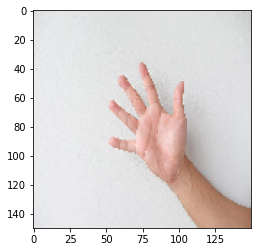

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline

upload = files.upload()

for U in upload.keys():

  #prediksi gambar
  path = U
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image = np.vstack([x])
  classes = model.predict(image, batch_size = 10)
  print(U)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('tidak dikenali')
  